In [3]:
import pandas as pd
import numpy as np
import altair as alt

In [4]:
alt.renderers.enable('notebook')
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Using altair data server to prevent notebook size from getting too large
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

In [6]:
alt.themes.enable('opaque')

ThemeRegistry.enable('opaque')

In [7]:
master_df = pd.read_csv('data/master.csv')

In [8]:
master_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1465.0,nm0005690,\N
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.4,176.0,nm0721526,\N
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.6,1086.0,nm0721526,\N
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short",6.5,105.0,nm0721526,\N
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,1791.0,nm0005690,\N


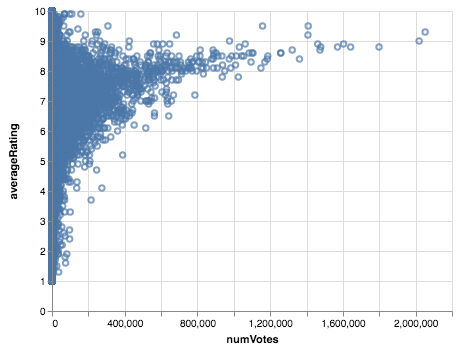

In [9]:
alt.Chart(master_df).mark_point().encode(
    alt.X('numVotes:Q'),
    alt.Y('averageRating:Q')
)

In [ ]:
alt.Chart(master_df).mark_bar().encode(
    alt.X('averageRating:O', bin=alt.Bin(maxbins=10)),
    alt.Y('count()'),
    alt.Color('median(numVotes)')
)

In [ ]:
temp_df = master_df.copy()
temp_df['numVotes'] = np.log(temp_df['numVotes'].astype(float))
alt.Chart(temp_df).mark_point().encode(
    alt.X('averageRating:O', bin=True),
    alt.Y('numVotes:Q', bin=True),
    size='count()'
)

In [10]:
test = master_df[master_df.startYear != '\\N']

In [11]:
test['decade'] = test['startYear'].astype(int)//10*10

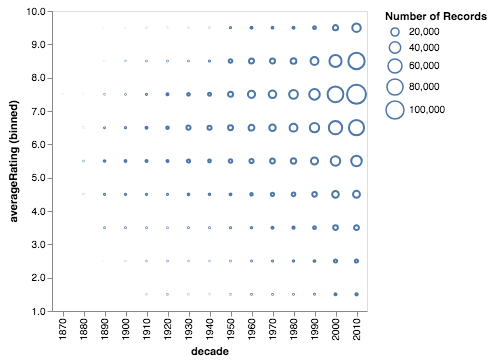

In [14]:
alt.Chart(test).mark_point().encode(
    alt.X('decade:N'),
    alt.Y('averageRating', bin=True),
    size='count()'
)

In [36]:
chart = alt.Chart(test).mark_circle(opacity=0.8, stroke='red', strokeWidth=1).encode(
    alt.X('decade:N'),
    alt.Y('averageRating'),
    size='count()'
)

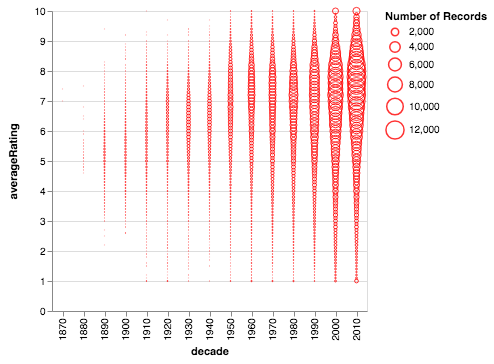

In [37]:
chart

In [41]:
alt.themes.enable('opaque')
chart.save('plots/beautiful.png', scale_factor=3.0)

TimeoutException: Message: timeout
  (Session info: headless chrome=72.0.3626.119)
  (Driver info: chromedriver=2.46.628411 (3324f4c8be9ff2f70a05a30ebc72ffb013e1a71e),platform=Mac OS X 10.13.6 x86_64)


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

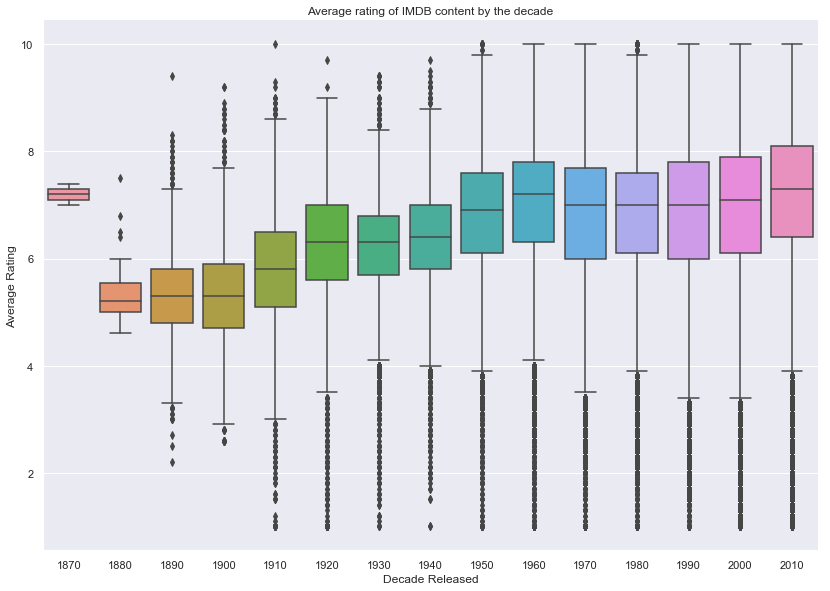

In [35]:
sns.set()
g = sns.catplot(x="decade", y="averageRating", kind="box", data=test, height=8.27, aspect=11.7/8.27)
plt.xlabel('Decade Released')
plt.ylabel('Average Rating')
plt.title('Average rating of IMDB content by the decade')
plt.show('g')

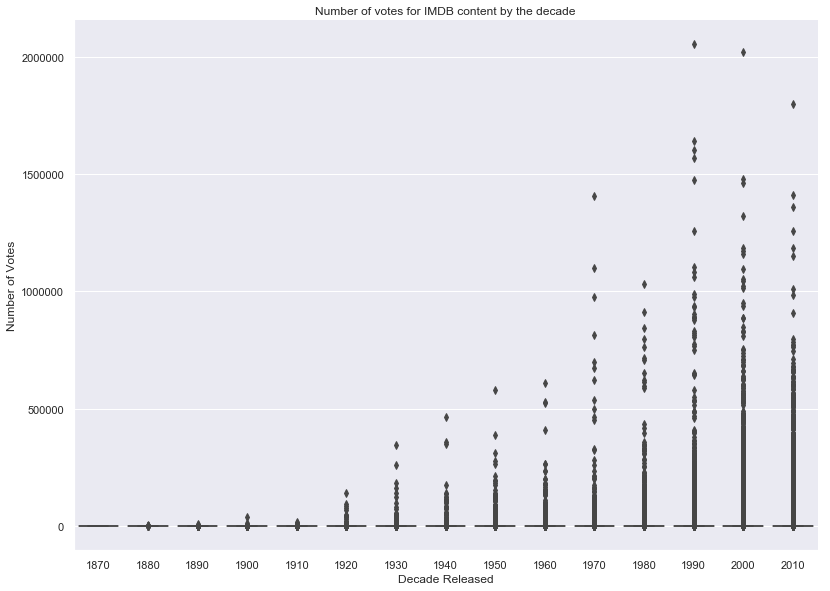

In [39]:
sns.set()
g = sns.catplot(x="decade", y="numVotes", kind="box", data=test, height=8.27, aspect=11.7/8.27)
plt.xlabel('Decade Released')
plt.ylabel('Number of Votes')
plt.title('Number of votes for IMDB content by the decade')
plt.show('g')